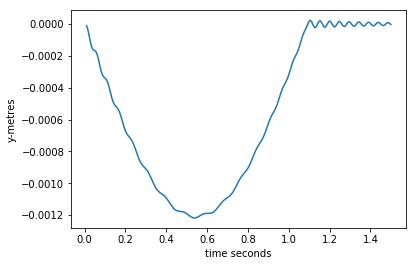

In [13]:
from numpy import sqrt, sin, cos, pi
import math, numpy
import scipy.integrate

E = 65e9     # Pa                      
nu = 0.34    # poisson's ratio alu
niu = 0.03   # damping ratio (zeta)
rho = 2700   # Alu density kg/m^3

# correction to niu
#om2 = (E*beamInertia/rho/(beamWidth*beamHeight))*(pl/beamLength)**4 # omega squared
#Fniu = 2*sqrt(om2)*niu   # Damping factor zeta
niu = 4.93   # damping ratio (zeta)


beamWidth = 0.06
beamHeight = 0.0034
beamLength = 0.6
beamMass = rho*beamWidth*beamHeight*beamLength
beamInertia = (beamWidth*beamHeight**3)/12 

ballMass = 0.5
ballVelocity = 0.55

M = beamMass
v = ballVelocity
Mb = ballMass
pl = pi/beamLength;
K = E*beamInertia*beamLength*pl**4


D = niu*beamMass;

def ssfmodelMLOL(t, y):
    bx = ballVelocity*t
    if bx <= beamLength:
        by = sqrt(2)*sin(bx*pl)
        by1 = sqrt(2)*pl*cos(bx*pl)
        by2 = -sqrt(2)*pl**2*sin(bx*pl)
        
        dM = Mb*by**2
        dD = 2*Mb*v*by * by1
        dK = Mb*v**2*by * by2
        bf = -by/(M+dM)
        
        ydot = [ y[1], 
                 -(K+dK)/(M+dM)*y[0] - (D+dD)/(M+dM)*y[1] + bf*Mb*9.81]
    else: 
        ydot = [ y[1], 
                 -K/M*y[0] - D/M*y[1] ]
    return ydot


r = scipy.integrate.ode(ssfmodelMLOL).set_integrator('vode', method='bdf', order=15)
r.set_initial_value(t=0, y=[0.0, 0.0])

ts = numpy.linspace(0.01, 1.5, 250)
ys = [ ]
yds = [ ]
for t in ts:
    y = r.integrate(t)
    ys.append(y[0])
    yds.append(y[1])
    
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(ts, ys)
plt.xlabel("time seconds")
plt.ylabel("y-metres");

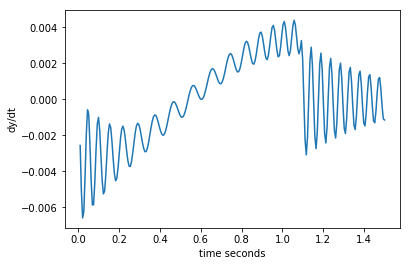

In [14]:
plt.plot(ts, yds)
plt.xlabel("time seconds")
plt.ylabel("dy/dt");

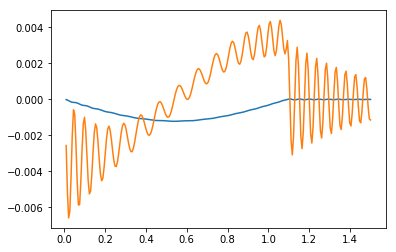

In [15]:
plt.plot(ts, ys)
plt.plot(ts, yds)
